# Basic visualisation of preprocessed data sets

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
import brsflufight_nerc2  as bff2

## Load data

Well that's easy ;-)

In [4]:
data_sets, data_columns = bff2.load_data_files()

bff2.summarise_data(data_sets, data_columns)

historical_GHG_Sectors_GCP
--------------------------------------
Index(['Bunkers', 'Cement', 'Coal', 'Gas', 'Gas flaring', 'Oil',
       'Total fossil fuels and cement'],
      dtype='object')
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11502 entries, ('Afghanistan', 'CO2', Timestamp('1960-01-01 00:00:00')) to ('Zimbabwe', 'CO2', Timestamp('2018-01-01 00:00:00'))
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Country                        11502 non-null  object        
 1   GH_Gas                         11502 non-null  object        
 2   date                           11502 non-null  datetime64[ns]
 3   Data source                    11502 non-null  object        
 4   Unit                           11502 non-null  object        
 5   max_year                       11502 non-null  int64         
 6   Bunkers       

## Visualising mobility

In [5]:
def plot_mobility(data_source, data_zone, data_sets, data_columns):
    df = data_sets[data_source]
    cols = data_columns[data_source]

    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(14,5)
    fig.suptitle(f"{data_source} in {data_zone}")

    # same plot as above
    axs[0].set_title('Raw mobility data')
    df.loc[data_zone].plot(y=cols, ax=axs[0])
    # 7 Day rolling average
    axs[1].set_title('Weekly averaged mobility data')
    df.loc[data_zone, cols].rolling('7D').mean().plot(ax=axs[1])

### Google

In [6]:
# We use the helper function to identify the exact name of what we're looking for:
print(bff2.find_matching_geo_id(data_sets['mobility_google'], 'GB_United Kingdom', 'nan_'))

['GB_United Kingdom', 'GB_United Kingdom_Greater Londo', 'GB_United Kingdom_Greater Manchester', 'GB_United Kingdom_Merseyside', 'GB_United Kingdom_Na h-Eileanan an Iar', 'GB_United Kingdom_South Yorkshire', 'GB_United Kingdom_Tyne and Wear', 'GB_United Kingdom_West Midlands', 'GB_United Kingdom_West Yorkshire']


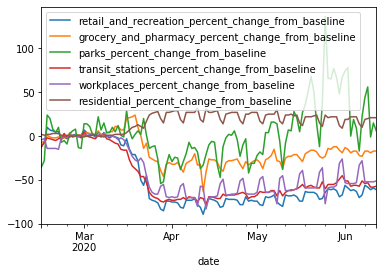

In [7]:
data_sets[
    'mobility_google'  # pick a data set
].loc[
    'GB_United Kingdom'  # use loc to pick a zone (can be done because it is a multi index)
].plot(
    y=data_columns['mobility_google']  # specify the columns to plot
)

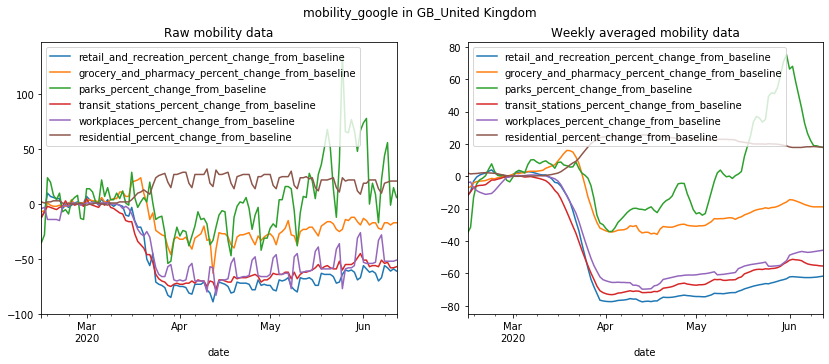

In [8]:
data_source = 'mobility_google'
data_zone = 'GB_United Kingdom'

plot_mobility(data_source, data_zone, data_sets, data_columns)

### Apple

In [9]:
print(bff2.find_matching_geo_id(data_sets['mobility_apple'], 'country/region_Unite', 'nan_'))

['country/region_United Arab Emirates', 'country/region_United Kingdom', 'country/region_United States']


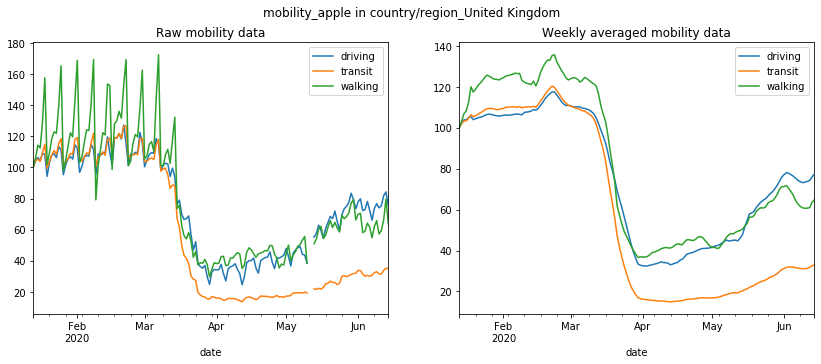

In [10]:
data_source = 'mobility_apple'
data_zone = 'country/region_United Kingdom'

plot_mobility(data_source, data_zone, data_sets, data_columns)

### Citymapper

In [11]:
citymap_mob = data_sets["mobility_citymapper"]

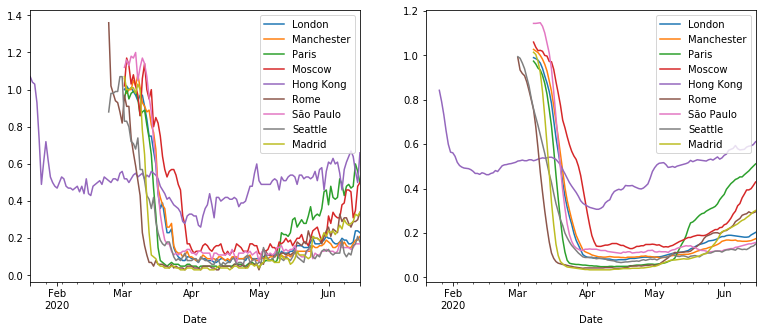

In [12]:
city_list = ['London', 'Manchester', 'Paris', 'Moscow', 'Hong Kong', 'Rome', 'São Paulo', 'Seattle', 'Madrid']

fig, axs = plt.subplots(1,2)
axs[0].figure.set_size_inches(13, 5)
citymap_mob[city_list].plot(ax=axs[0])
citymap_mob[city_list].rolling(7).mean().plot(ax=axs[1])